In [1]:
%load_ext autoreload 
%autoreload 2

In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
import math 

In [5]:
import gpt 

model = gpt.gpt_model(vocab_size=100000).cuda()
out = model(torch.randint(0, 100000, (16, 256), device='cuda'))

torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
torch.Size([16, 256, 256])
t

In [83]:
model.blocks[0].sa.heads[0].adaptive_span.current_val

Parameter containing:
tensor([[[0.]]], device='cuda:0', requires_grad=True)

In [84]:
model.blocks[0].sa.heads[1].adaptive_span.current_val

Parameter containing:
tensor([[[0.]]], device='cuda:0', requires_grad=True)

In [38]:
x = torch.linspace(0, 10, 11)
x / (x.sum() + 1e-8) 

tensor([0.0000, 0.0182, 0.0364, 0.0545, 0.0727, 0.0909, 0.1091, 0.1273, 0.1455,
        0.1636, 0.1818])

In [3]:
class adaptive_mask(nn.Module): 
	def __init__(self, max_size, ramp_size, init_val=0, shape=(1,1,1)): 
		super().__init__() 
		self.max_size = max_size 
		self.ramp_size = ramp_size 
		self.current_val = nn.Parameter(torch.zeros(*shape) + init_val)
		mask_template = torch.linspace(1 - max_size, 0, steps=max_size)
		self.register_buffer('mask_template', mask_template)

	def forward(self, x): 
		mask = self.mask_template + self.current_val * self.max_size 
		mask = mask / self.ramp_size + 1 
		mask = mask.clamp(0, 1) 
		if x.size(-1) < self.max_size: 
			mask = mask[:, :, -x.size(-1):]
		x = x * mask 
		x = x / (x.sum(-1, keepdim=True) + 1e-8)
		return x 
	
attn_weight = torch.softmax(torch.randn(size=(16, 64, 64)), dim=-1)
x = adaptive_mask(max_size=64, ramp_size=64)(attn_weight)

In [34]:
mask_template = torch.linspace(1 - 4096, 0, steps=4096) 
current_val = nn.Parameter(torch.zeros(1, 1, 1))
max_size = 4096
ramp_size = 4096

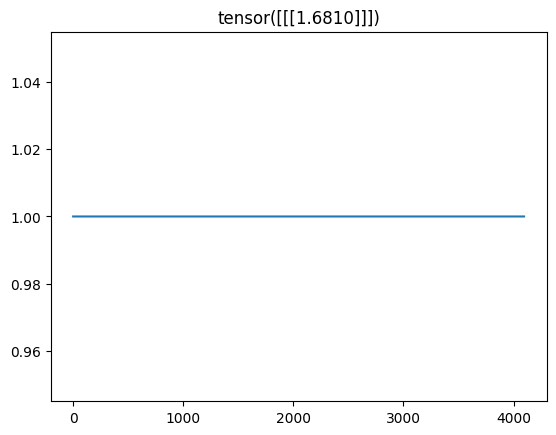

In [48]:
rand = torch.randn((1, 1, 1))
plt.title(rand)
plt.plot((((mask_template + rand * max_size)/ramp_size + 1).clamp(0, 1))[0, 0].detach())

In [63]:
x.min(), x.max()

(tensor(6.7210e-06, grad_fn=<MinBackward1>),
 tensor(0.3023, grad_fn=<MaxBackward1>))

In [64]:
(x / x.sum(-1, keepdim=True)).min(), (x / x.sum(-1, keepdim=True)).max()

(tensor(1.2723e-05, grad_fn=<MinBackward1>),
 tensor(0.4925, grad_fn=<MaxBackward1>))

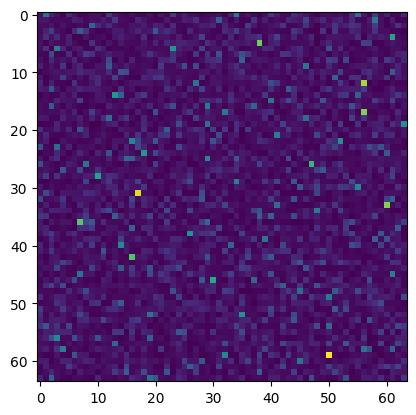

In [66]:
plt.imshow(attn_weight[0])

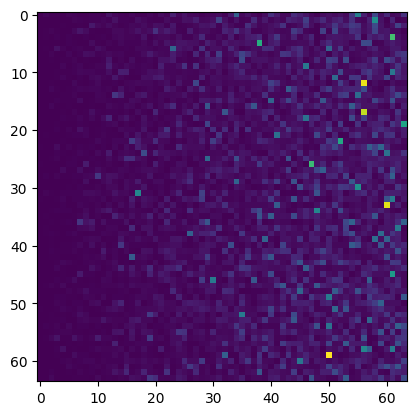

In [59]:
plt.imshow((x / (x.sum(-1, keepdim=True) + 1e-8))[0].detach())

In [5]:
attn_weight

tensor([[[-0.8429, -0.0876,  0.1345,  ...,  1.5483, -0.7404,  1.1195],
         [-0.6880, -0.0222, -0.9401,  ..., -0.5602,  0.9449,  1.4373],
         [-0.2392, -0.4993,  0.4248,  ...,  0.9640, -0.8248,  0.2008],
         ...,
         [-0.4767,  0.4453,  0.0862,  ...,  1.1203,  0.6439, -1.1207],
         [ 1.3758,  0.8262, -2.1396,  ...,  0.4411, -1.7570, -0.8262],
         [ 0.0650, -1.4633,  1.5181,  ...,  0.9173, -0.3190, -1.6042]],

        [[-0.3612, -0.2719, -0.0206,  ..., -0.5909, -0.4786,  0.7000],
         [-1.0337, -1.4603,  0.3079,  ...,  1.0977, -0.3514,  1.6286],
         [ 0.5557,  1.2073,  0.3670,  ..., -0.2703,  0.4233,  0.7436],
         ...,
         [-0.7125,  1.0942, -0.1815,  ..., -0.9834, -1.0187,  0.0296],
         [-1.1186, -0.1222,  1.1004,  ..., -0.9917,  0.3045,  0.5217],
         [-0.2510,  0.1470,  0.1500,  ..., -0.0239,  0.6384, -0.9922]],

        [[-1.5692, -1.1144,  1.1777,  ...,  1.5191, -0.2533, -0.3282],
         [ 0.9489,  1.0563, -2.5253,  ..., -1